In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Files/Datasets/12-14-2020.csv")
print("========First 5 Rows========")
print(df.head())
print("========Data Information========")
print(df.info())
if df.isnull().values.any():
    df = df.fillna(df.mean())
    print("[INFO] There are null values, Don't worry it's filled with mean.")

========First 5 Rows========
   FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2020-12-15 05:26:38  33.93911   
1   NaN    NaN            NaN        Albania  2020-12-15 05:26:38  41.15330   
2   NaN    NaN            NaN        Algeria  2020-12-15 05:26:38  28.03390   
3   NaN    NaN            NaN        Andorra  2020-12-15 05:26:38  42.50630   
4   NaN    NaN            NaN         Angola  2020-12-15 05:26:38 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      48718    1969      38252   8497.0  Afghanistan   
1  20.168300      49191    1016      24820  23355.0      Albania   
2   1.659600      92597    2609      60888  29100.0      Algeria   
3   1.521800       7382      79       6706    597.0      Andorra   
4  17.873900      16277     372       8924   6981.0       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     125.147897             4.041627  
1    17

In [10]:
data = []
for i in df.Country_Region.unique():
    temp = []
    temp.append(i)
    temp.append(df.loc[:,"Confirmed"][ (df.Last_Update == df.Last_Update.max()) & (df.Country_Region == i) ].sum())
    temp.append(df.loc[:,"Deaths"][ (df.Last_Update == df.Last_Update.max()) & (df.Country_Region == i) ].sum())
    temp.append(df.loc[:,"Recovered"][ (df.Last_Update == df.Last_Update.max()) & (df.Country_Region == i) ].sum())
    data.append(temp)
pd.DataFrame(data, columns=["Country","Confirmed","Deaths","Recovered"])

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,48718,1969,38252
1,Albania,49191,1016,24820
2,Algeria,92597,2609,60888
3,Andorra,7382,79,6706
4,Angola,16277,372,8924
...,...,...,...,...
186,Vietnam,1402,35,1246
187,West Bank and Gaza,111102,1000,87057
188,Yemen,2084,606,1384
189,Zambia,18322,367,17409


In [11]:
data = []
for i in df.Country_Region.unique():
    for j in df.Province_State[df.Country_Region == i].unique():
        temp = []
        temp.append(i)
        temp.append(j)
        temp.append(df.loc[:,"Confirmed"][ (df.Last_Update == df.Last_Update.max()) & (df.Province_State == j) ].sum())
        temp.append(df.loc[:,"Deaths"][ (df.Last_Update == df.Last_Update.max()) & (df.Province_State == j) ].sum())
        temp.append(df.loc[:,"Recovered"][ (df.Last_Update == df.Last_Update.max()) & (df.Province_State == j) ].sum())
        data.append(temp)
pd.DataFrame(data, columns=["Country", "Province","Confirmed","Deaths","Recovered"])

,Country,Province,Confirmed,Deaths,Recovered
0,Afghanistan,NaN,0,0,0
1,Albania,NaN,0,0,0
2,Algeria,NaN,0,0,0
3,Andorra,NaN,0,0,0
4,Angola,NaN,0,0,0
...,...,...,...,...,...
755,Vietnam,NaN,0,0,0
756,West Bank and Gaza,NaN,0,0,0
757,Yemen,NaN,0,0,0
758,Zambia,NaN,0,0,0


In [14]:
data = []
for j in df.Province_State[df.Country_Region == "China"].unique():
    temp = []
    temp.append(j)
    temp.append(df.loc[:,"Confirmed"][ (df.Last_Update == df.Last_Update.max()) & (df.Province_State == j) ].sum())
    temp.append(df.loc[:,"Deaths"][ (df.Last_Update == df.Last_Update.max()) & (df.Province_State == j) ].sum())
    temp.append(df.loc[:,"Recovered"][ (df.Last_Update == df.Last_Update.max()) & (df.Province_State == j) ].sum())
    data.append(temp)
pd.DataFrame(data, columns=["Province","Confirmed","Deaths","Recovered"])

,Province,Confirmed,Deaths,Recovered
0,Anhui,992,6,986
1,Beijing,956,9,940
2,Chongqing,590,6,583
3,Fujian,502,1,469
4,Gansu,182,2,180
5,Guangdong,2018,8,1973
6,Guangxi,264,2,261
7,Guizhou,147,2,145
8,Hainan,171,6,165
9,Hebei,373,6,367


In [16]:
data = []
for i in df.Country_Region.unique():
    temp = [i]
    temp.append(df.loc[:,"Deaths"][ (df.Last_Update == df.Last_Update.max()) & (df.Country_Region == i) ].sum())
    data.append(temp)
pd.DataFrame(data, columns=["Country","Deaths"])

,Country,Deaths
0,Afghanistan,1969
1,Albania,1016
2,Algeria,2609
3,Andorra,79
4,Angola,372
...,...,...
186,Vietnam,35
187,West Bank and Gaza,1000
188,Yemen,606
189,Zambia,367


In [17]:
data = []
for i in df.Country_Region.unique():
    temp = [i]
    temp.append(df.Recovered[ (df.Last_Update == df.Last_Update.max()) & (df.Country_Region == i) ].sum())
    data.append(temp)
pd.DataFrame(data, columns=["Country","Recovered"])

,Country,Recovered
0,Afghanistan,38252
1,Albania,24820
2,Algeria,60888
3,Andorra,6706
4,Angola,8924
...,...,...
186,Vietnam,1246
187,West Bank and Gaza,87057
188,Yemen,1384
189,Zambia,17409


In [18]:
data = []
for i in df.Country_Region.unique():
    if df.Recovered[df.Country_Region == i].sum() == 0 :
        data.append(i)
pd.DataFrame(data, columns=["Country"])

,Country
0,Belgium
1,Serbia
2,Sweden


In [19]:
data = []
for i in df.Country_Region.unique():
    if df.Deaths[df.Country_Region == i].sum() > 0 :
        data.append([i, df.Deaths[df.Country_Region == i].sum()])
pd.DataFrame(data, columns=["Country", "Deaths"])

,Country,Deaths
0,Afghanistan,1969
1,Albania,1016
2,Algeria,2609
3,Andorra,79
4,Angola,372
...,...,...
170,Vietnam,35
171,West Bank and Gaza,1000
172,Yemen,606
173,Zambia,367


In [20]:
data = []
for i in df.Country_Region.unique():
    if df.Recovered[df.Country_Region == i].sum() > 0 :
        data.append([i, df.Recovered[df.Country_Region == i].sum()])
pd.DataFrame(data, columns=["Country", "Recovered"])

,Country,Recovered
0,Afghanistan,38252
1,Albania,24820
2,Algeria,60888
3,Andorra,6706
4,Angola,8924
...,...,...
183,Vietnam,1246
184,West Bank and Gaza,87057
185,Yemen,1384
186,Zambia,17409


In [25]:
data = []
for i in df.Country_Region.unique()[:10]:
    temp = []
    temp.append(i)
    temp.append(df.Last_Update[df.Country_Region == i].iloc[0])
    temp.append(df.loc[:,"Confirmed"][ (df.Last_Update == df.Last_Update.max()) & (df.Country_Region == i) ].sum())
    temp.append(df.loc[:,"Deaths"][ (df.Last_Update == df.Last_Update.max()) & (df.Country_Region == i) ].sum())
    temp.append(df.loc[:,"Recovered"][ (df.Last_Update == df.Last_Update.max()) & (df.Country_Region == i) ].sum())
    data.append(temp)
pd.DataFrame(data, columns=["Country","Last_Update","Confirmed","Deaths","Recovered"])

,Country,Last_Update,Confirmed,Deaths,Recovered
0,Afghanistan,2020-12-15 05:26:38,48718,1969,38252
1,Albania,2020-12-15 05:26:38,49191,1016,24820
2,Algeria,2020-12-15 05:26:38,92597,2609,60888
3,Andorra,2020-12-15 05:26:38,7382,79,6706
4,Angola,2020-12-15 05:26:38,16277,372,8924
5,Antigua and Barbuda,2020-12-15 05:26:38,148,5,138
6,Argentina,2020-12-15 05:26:38,1503222,41041,1340120
7,Armenia,2020-12-15 05:26:38,148682,2503,125966
8,Australia,2020-12-15 05:26:38,28048,908,25689
9,Austria,2020-12-15 05:26:38,325051,4530,284174


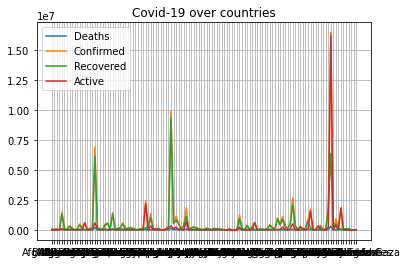

In [27]:
data = [[],[],[],[],[]]
for i in df.Country_Region.unique():
    if df.Deaths[df.Country_Region == i].sum() > 150 :
        data[0].append(i)
        data[1].append(df.loc[:,"Deaths"][df.Country_Region == i].sum())
        data[2].append(df.loc[:,"Confirmed"][df.Country_Region == i].sum())
        data[3].append(df.loc[:,"Recovered"][df.Country_Region == i].sum())
        data[4].append(df.loc[:,"Active"][df.Country_Region == i].sum())

plt.plot(data[0], data[1])
plt.plot(data[0], data[2])
plt.plot(data[0], data[3])
plt.plot(data[0], data[4])
plt.title("Covid-19 over countries")
plt.grid(True)
plt.legend(["Deaths", "Confirmed", "Recovered", "Active"])
plt.show()

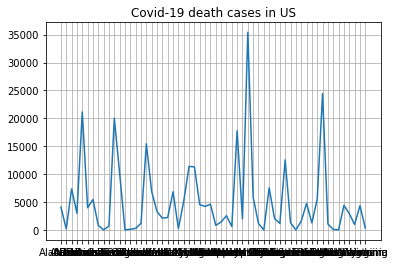

In [28]:
data = [[],[]]
for i in df[df.Country_Region == 'US'].Province_State.unique():
    data[0].append(i)
    data[1].append(df.Deaths[df.Province_State == i].sum())
plt.plot(data[0], data[1])
plt.title("Covid-19 death cases in US")
plt.grid(True)
plt.show()

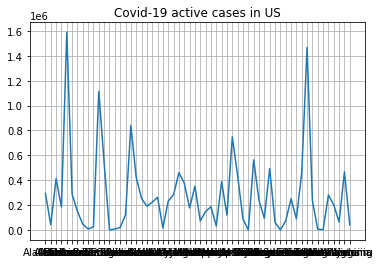

In [29]:
data = [[],[]]
for i in df[df.Country_Region == 'US'].Province_State.unique():
    data[0].append(i)
    data[1].append(df.Active[df.Province_State == i].sum())
plt.plot(data[0], data[1])
plt.title("Covid-19 active cases in US")
plt.grid(True)
plt.show()

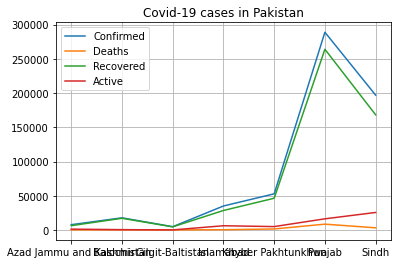

In [30]:
data = [[],[],[],[],[]]
for i in df[df.Country_Region == 'Pakistan'].Province_State.unique():
    data[0].append(i)
    data[1].append(df.Confirmed[df.Province_State == i].sum())
    data[2].append(df.Deaths[df.Province_State == i].sum())
    data[3].append(df.Recovered[df.Province_State == i].sum())
    data[4].append(df.Active[df.Province_State == i].sum())
plt.plot(data[0], data[1])
plt.plot(data[0], data[2])
plt.plot(data[0], data[3])
plt.plot(data[0], data[4])
plt.title("Covid-19 cases in Pakistan")
plt.grid(True)
plt.legend(["Confirmed", "Deaths", "Recovered", "Active"])
plt.show()

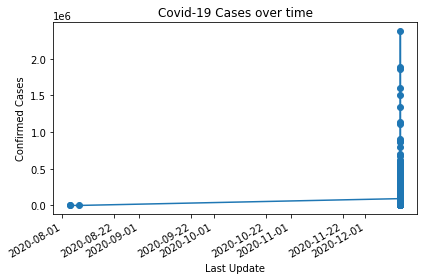

In [32]:
df.Last_Update = pd.to_datetime(df.Last_Update)
df.sort_values('Last_Update', inplace=True)
plt.plot_date(df.Last_Update, df.Confirmed, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Covid-19 Cases over time')
plt.xlabel('Last Update')
plt.ylabel('Confirmed Cases')
plt.tight_layout()
plt.show()